##### Model evaludation
https://scikit-learn.org/stable/modules/model_evaluation.html

##### sklearn.neighbors.KNeighborsClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.kneighbors

##### Model selection and evaluation
https://scikit-learn.org/stable/model_selection.html

Precision and Recall
https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

##### sklearn.metrics.roc_curve
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

##### sklearn.metrics.precision_recall_curve
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html


##### Confusion Matrix
https://stats.stackexchange.com/questions/51296/how-do-you-calculate-precision-and-recall-for-multiclass-classification-using-co

In [1]:
# Baisc Tools
import os
import numpy as np
import pandas as pd
import pickle
import mpu # mpu.datastructures.flatten() to flatten a list
 
# timing
import time

# Plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#from scipy import misc # to show the image

In [2]:
# Set wrok.dir
work_path = "C:/Users/WeiKuang/Desktop/BioStat 2018 Fall/ECS171_MachineLearning/Project_Data"
os.chdir(work_path)

# DataLoading

In [4]:
with open('xtrain_doodle.pickle', 'rb') as f:
    X_train = pickle.load(f)

with open('xtest_doodle.pickle', 'rb') as f:
    X_test = pickle.load(f)

with open('ytrain_doodle.pickle', 'rb') as f:
    y_train = pickle.load(f)

with open('ytest_doodle.pickle', 'rb') as f:
    y_test = pickle.load(f)

# Data Viewing 
category: (0,ant), (1,bear), (2, bee), (3,cat), (4,crab), (5,dragon), (6,elephant), (7, mouse), (8, sea turtle), (9, snail)

In [42]:
Class = ['ant', 'bear', 'bee', 'cat', 'crab', 'dragon', 'elephant', 'mouse', 'sea turtle', 'snail']

In [43]:
print('Training set')
print('X', X_train.shape)
print('y', y_train.shape)
print('\n')
print('Testing set')
print('X', X_test.shape)
print('y', y_test.shape)

Training set
X (24000, 784)
y (24000,)


Testing set
X (6000, 784)
y (6000,)


# X

In [5]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Y

In [6]:
# the label is the index of the ten categories.
y_train[0:100]

array([9., 2., 5., 4., 8., 4., 8., 1., 3., 9., 8., 3., 8., 4., 9., 5., 6.,
       0., 1., 7., 8., 2., 7., 9., 6., 0., 7., 7., 5., 1., 2., 8., 3., 0.,
       7., 8., 2., 1., 0., 4., 7., 9., 2., 9., 3., 2., 3., 2., 6., 3., 9.,
       5., 0., 8., 9., 3., 6., 0., 6., 0., 0., 5., 6., 0., 2., 4., 5., 9.,
       4., 7., 8., 4., 3., 6., 1., 1., 7., 0., 2., 1., 1., 5., 9., 8., 4.,
       5., 9., 7., 6., 6., 1., 4., 9., 8., 4., 4., 7., 4., 8., 5.],
      dtype=float32)

# Visualization

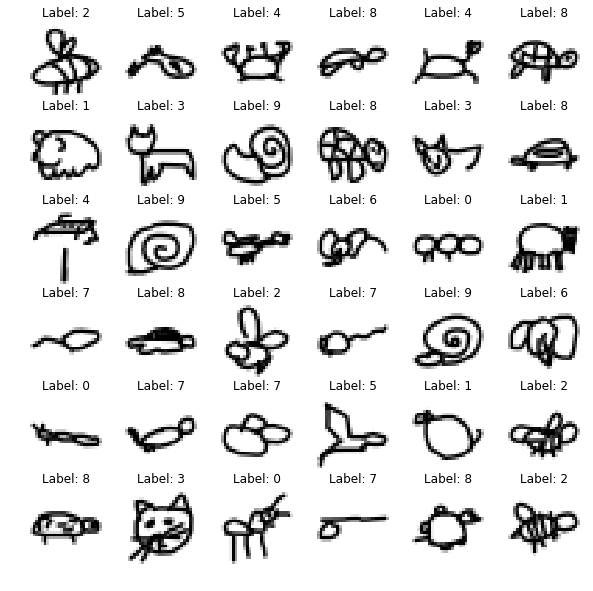

In [7]:
fig=plt.figure(figsize=(10, 10)) # The size of the final displayed image
columns = 6
rows = 6

for i in range(1, columns*rows +1):
    img = X_train[i].reshape(28,28)
    fig.add_subplot(rows, columns, i).axis('off')
    plt.title( 'Label: '+ str(y_train[i].astype(np.int)) )             # if y is not dummy
    plt.imshow(img,  cmap='binary') # cmap is Colormap to control the color
    # https://matplotlib.org/gallery/color/colormap_reference.html 
plt.show()

# Split train into "pure" train and validation sets

In [8]:
from sklearn.model_selection import train_test_split
X_puretrain, X_val, y_puretrain, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

# KNN Model Construction

In [9]:
from sklearn.neighbors import KNeighborsClassifier
KNN_clf = KNeighborsClassifier()

# Grid Search

In [10]:
from sklearn.model_selection import GridSearchCV

In [298]:
param_grid = [{'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}]

In [299]:
# Set for grid search
grid_search_1 = GridSearchCV(KNN_clf, param_grid, cv=3, return_train_score=True) # scoring can be ccustom-defined


# Run grid search using whole training set
start_time = time.time()
grid_search_1.fit(X_train, y_train)
end_time = time.time()

print(end_time-start_time)

10969.240164756775


In [300]:
print( 'hours :', (end_time-start_time)/3600)

hours : 3.047011156876882


In [301]:
grid_search_1.best_params_

{'n_neighbors': 15}

In [302]:
grid_search_1.cv_results_

{'mean_fit_time': array([2.31998968, 1.67052639, 1.80781662, 1.9243964 , 1.939381  ,
        1.83443964, 1.73799586, 2.01683605, 1.65404546, 1.72900295,
        1.59557903, 1.67254281, 1.75148761, 1.57858825]),
 'mean_score_time': array([204.10824943, 209.17669344, 207.94422662, 217.10765839,
        213.07075632, 189.67289543, 201.82321095, 208.72932041,
        180.38376141, 179.8280828 , 178.72921836, 178.80416632,
        178.96309447, 179.04953349]),
 'mean_test_score': array([0.50395833, 0.532625  , 0.54529167, 0.55795833, 0.56308333,
        0.56545833, 0.56708333, 0.570375  , 0.570125  , 0.57175   ,
        0.57025   , 0.57141667, 0.57141667, 0.57270833]),
 'mean_train_score': array([0.79495821, 0.75087381, 0.72712306, 0.71004047, 0.69862357,
        0.68662403, 0.67866544, 0.66941519, 0.66408231, 0.65733212,
        0.65295716, 0.64816585, 0.64366554, 0.63870738]),
 'param_n_neighbors': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
              mask=[Fal

In [17]:
cv_results= grid_search_1.cv_results_
for value , params in zip (cv_results['mean_test_score'], cv_results['params']):
    print(value, params)
    
# If scoring = None, the estimator’s default scorer (if available) is used.   
# The estimator is KNN.  Its score(X, y[, sample_weight])	Returns the mean accuracy on the given test data and labels.
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.kneighbors

0.5249166666666667 {'n_neighbors': 1}
0.514875 {'n_neighbors': 2}
0.5734166666666667 {'n_neighbors': 5}


# GridSearch 2

In [317]:
param_grid = [{'n_neighbors':[10, 25 , 50]}]

# Set for grid search
grid_search_2 = GridSearchCV(KNN_clf, param_grid, cv=3, return_train_score=True) # scoring can be ccustom-defined


# Run grid search using whole training set
start_time = time.time()
grid_search_2.fit(X_train, y_train)
end_time = time.time()

print(end_time-start_time)

5354.698770999908


In [318]:
grid_search_2.best_params_

{'n_neighbors': 10}

In [319]:
grid_search_2.cv_results_

{'mean_fit_time': array([3.59550452, 3.01361434, 2.89944633]),
 'mean_score_time': array([202.97736875, 202.01058873, 191.02707481]),
 'mean_test_score': array([0.585625  , 0.57779167, 0.56041667]),
 'mean_train_score': array([0.67224993, 0.62293736, 0.58547894]),
 'param_n_neighbors': masked_array(data=[10, 25, 50],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 10}, {'n_neighbors': 25}, {'n_neighbors': 50}],
 'rank_test_score': array([1, 2, 3]),
 'split0_test_score': array([0.59877546, 0.58865425, 0.57053605]),
 'split0_train_score': array([0.67143839, 0.62055385, 0.58223417]),
 'split1_test_score': array([0.58025, 0.5755 , 0.5535 ]),
 'split1_train_score': array([0.6728125, 0.6255   , 0.5883125]),
 'split2_test_score': array([0.57784169, 0.56921346, 0.55720895]),
 'split2_train_score': array([0.67249891, 0.62275823, 0.58589015]),
 'std_fit_time': array([0.3233377 , 0.33637029, 0.25361259]),
 'std_score_time':

# Confusion Matrix of KNN(k=5)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
KNN_5=KNeighborsClassifier(n_neighbors=5)

# Fit the model
KNN_5.fit(X_train, y_train)

KeyboardInterrupt: 

In [19]:
prediction = KNN_5.predict(X_test)
prediction

array([3., 4., 2., ..., 5., 6., 4.], dtype=float32)

In [20]:
prediction_prob = KNN_5.predict_proba(X_test)
prediction_prob

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0.4, ..., 0. , 0. , 0.2],
       ...,
       [0. , 0. , 0. , ..., 0.4, 0.2, 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction, labels=[0,1,2,3,4,5,6,7,8,9])
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

In [38]:
cm

array([[383,  11,  15,   4,  19,  34,  18, 120,  32,   9],
       [ 38, 372,  13,  32,  14,  12,  16,  82,  28,   4],
       [ 69,  25, 365,  16,   9,  26,   7,  37,  25,  36],
       [ 26,  78,  26, 314,  40,  21,   9,  53,  11,  16],
       [ 32,  20,   7,  24, 382,  16,   6,  28,  44,   6],
       [ 89,  43,  29,  20,  53, 193,  14,  91,  28,  22],
       [ 45,  51,  18,  13,  20,  30, 277,  88,  58,  16],
       [ 27,  37,  12,  16,  14,  17,  10, 433,  17,  10],
       [ 23,  34,  19,  12,  30,  14,  15,  52, 341,  19],
       [ 16,   9,  13,   7,   5,   7,  11,  34,  14, 504]], dtype=int64)

In [29]:
cm[0]

array([383,  11,  15,   4,  19,  34,  18, 120,  32,   9], dtype=int64)

In [26]:
cm[0].sum()

645

In [28]:
sum(y_test==0)

645

In [35]:
sum(cm[:, 0])

748

In [34]:
sum(prediction==0)

748

In [22]:
recall

array([0.59379845, 0.60883797, 0.59349593, 0.52861953, 0.67610619,
       0.33161512, 0.44967532, 0.7301855 , 0.61001789, 0.81290323])

In [23]:
precision

array([0.51203209, 0.54705882, 0.70599613, 0.68558952, 0.65187713,
       0.52162162, 0.7232376 , 0.42534381, 0.57023411, 0.78504673])

In [39]:
F1_score = 2/ ((1/precision) + (1/recall))
F1_score

array([0.54989232, 0.57629744, 0.64487633, 0.59695817, 0.66377063,
       0.40546218, 0.55455455, 0.53755431, 0.58945549, 0.79873217])

In [44]:
PRF1 = pd.DataFrame({ 'Class': Class,'f1 socre': F1_score, 'precision':precision, 'recall':recall})
PRF1

,Class,f1 socre,precision,recall
0,ant,0.549892,0.512032,0.593798
1,bear,0.576297,0.547059,0.608838
2,bee,0.644876,0.705996,0.593496
3,cat,0.596958,0.685590,0.528620
4,crab,0.663771,0.651877,0.676106
5,dragon,0.405462,0.521622,0.331615
6,elephant,0.554555,0.723238,0.449675
7,mouse,0.537554,0.425344,0.730185
8,sea turtle,0.589455,0.570234,0.610018
9,snail,0.798732,0.785047,0.812903


# Confusion Matrix of KNN(k=13)

In [50]:
# Fit the model
KNN_13=KNeighborsClassifier(n_neighbors=13)
KNN_13.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

In [51]:
prediction13 = KNN_13.predict(X_test)

In [52]:
prediction13 

array([3., 4., 3., ..., 5., 6., 4.], dtype=float32)

In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction13, labels=[0,1,2,3,4,5,6,7,8,9])
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
F1_score = 2/ ((1/precision) + (1/recall))

In [55]:
PRF1_KNN13 = pd.DataFrame({ 'Class': Class,'f1 socre': F1_score, 'precision':precision, 'recall':recall})
PRF1_KNN13

,Class,f1 socre,precision,recall
0,ant,0.589825,0.605220,0.575194
1,bear,0.591459,0.582540,0.600655
2,bee,0.669058,0.746000,0.606504
3,cat,0.596421,0.728155,0.505051
4,crab,0.659704,0.648973,0.670796
5,dragon,0.441057,0.539801,0.372852
6,elephant,0.565306,0.760989,0.449675
7,mouse,0.534325,0.404329,0.787521
8,sea turtle,0.594947,0.546407,0.652952
9,snail,0.800310,0.769345,0.833871


In [316]:
print( np.mean(PRF1_KNN13['precision']), np.mean(PRF1_KNN13['recall']), np.mean(PRF1_KNN13['f1 socre']) )

0.6331759287537098 0.6055070798017784 0.6042412076694105


In [310]:
KNN13_Acc = sum(prediction13 == y_test) / len(y_test)
KNN13_Acc

0.6055

#  Precision and Recall
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

In [57]:
from sklearn.metrics import precision_recall_curve

y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])  # probas_pred = Estimated probabilities or decision function
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

print(precision)  
print(recall)
print(thresholds)


[0.66666667 0.5        1.         1.        ]
[1.  0.5 0.5 0. ]
[0.35 0.4  0.8 ]


In [58]:
y_probas_pred= KNN_13.predict_proba(X_test)
y_probas_pred

array([[0.        , 0.        , 0.        , ..., 0.07692308, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.23076923, ..., 0.        , 0.        ,
        0.30769231],
       ...,
       [0.        , 0.        , 0.07692308, ..., 0.15384615, 0.15384615,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.23076923, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [59]:
y_probas_pred[0]

array([0.        , 0.        , 0.        , 0.92307692, 0.        ,
       0.        , 0.        , 0.07692308, 0.        , 0.        ])

In [69]:
y_estimated_prob=[]
for i in y_probas_pred:
    y_estimated_prob.append(np.max(i))
    
y_estimated_prob[0:10]

[0.9230769230769231,
 1.0,
 0.38461538461538464,
 0.6923076923076923,
 0.5384615384615384,
 0.6923076923076923,
 0.6923076923076923,
 0.7692307692307693,
 0.38461538461538464,
 0.7692307692307693]

# Cross Validation Prediction
Get the scores of all instances in the trainning set

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html

In [79]:
from sklearn.model_selection import cross_val_predict
# y_scores = cross_val_predict(KNN_13,X_train, y_train, cv=3, method= 'predict_proba')
KNN_13= KNeighborsClassifier(n_neighbors=13)
y_scores = cross_val_predict(KNN_13,X_train, y_train, cv=3, method= "predict_proba")
# For method=’predict_proba’, the columns correspond to the classes in sorted order.

In [81]:
y_scores[0:15] 
y_scores.shape

(24000, 10)

In [77]:
y_scores[0:15] 

array([4., 2., 4., 4., 0., 4., 8., 1., 7., 9., 2., 7., 8., 7., 9.],
      dtype=float32)

In [78]:
prediction13[0:15]

array([3., 4., 3., 2., 7., 0., 0., 1., 6., 9., 7., 6., 1., 4., 2.],
      dtype=float32)

#  Precision versus Recall
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

Convert y_train and y_test into dummy (binary indicator)

In [99]:
y_train_dummy = pd.get_dummies(y_train)
y_test_dummy = pd.get_dummies(y_test)
print('y_train_dummy', '\n', y_train_dummy.head())
print('y_test_dummy', '\n', y_test_dummy.head())

y_train_dummy 
    0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0
0    0    0    0    0    0    0    0    0    0    1
1    0    0    1    0    0    0    0    0    0    0
2    0    0    0    0    0    1    0    0    0    0
3    0    0    0    0    1    0    0    0    0    0
4    0    0    0    0    0    0    0    0    1    0
y_test_dummy 
    0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0
0    0    0    0    1    0    0    0    0    0    0
1    0    0    0    0    1    0    0    0    0    0
2    0    0    0    0    0    0    0    0    0    1
3    0    0    1    0    0    0    0    0    0    0
4    0    0    0    0    0    0    0    1    0    0


###  For label 0, Class 0, Ant 

In [100]:
y_train_C0 = y_train_dummy.iloc[:,0]
y_test_C0 = y_test_dummy.iloc[:,0]

In [209]:
#y_train_C0.shape

In [210]:
#y_test_C0.shape

In [104]:
# Model Construction and fitting
KNN_13_C0_clf = KNeighborsClassifier(n_neighbors=13)
KNN_13_C0_clf.fit(X_train, y_train_C0)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

In [119]:
# Prediction for C0
pred_C0 = KNN_13_C0_clf.predict(X_test)
pred_C0 

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [111]:
# Predicted prob on testing set
pred_prob_C0 = KNN_13_C0_clf.predict_proba(X_test)
pred_prob_C0 # 1th-column is the estimated probability for target class

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [127]:
print('true C0 label','\n', y_test_C0.iloc[4:8], '\n')
print('predicted C0 label','\n', pred_C0 [4:8], '\n')
print('predicted prob', '\n', pred_prob_C0[4:8], '\n')

true C0 label 
 4    0
5    0
6    1
7    0
Name: 0.0, dtype: uint8 

predicted C0 label 
 [0 1 1 0] 

predicted prob 
 [[1.         0.        ]
 [0.30769231 0.69230769]
 [0.30769231 0.69230769]
 [0.92307692 0.07692308]] 



In [222]:
# The predicted prob for the target class = the y_scores
# Note the target class is in the 1-th column
y_scores=pred_prob_C0[:,1]
y_scores    

array([0., 0., 0., ..., 0., 0., 0.])

In [223]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test_C0, y_scores  )

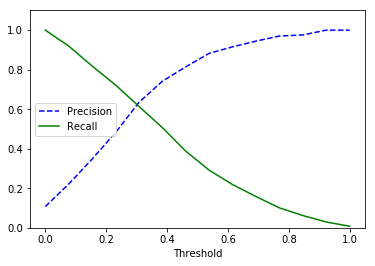

In [224]:
def plot_PR_Curve_vs_threshold(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "b--", label="Precision")
    plt.plot(threshold, recall[:-1], "g-", label="Recall")
    plt.xlabel('Threshold')
    plt.legend(loc='center left')
    plt.ylim([0,1.1])
    
plot_PR_Curve_vs_threshold(precision, recall, threshold)

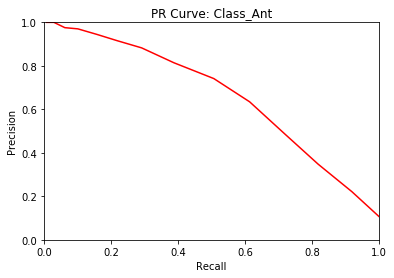

In [225]:
def plot_PR_Curve(precision, recall, title):
    plt.plot( recall[:-1], precision[:-1], 'red')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.axis([0,1,0,1])
    plt.title( 'PR Curve: '+title)

plot_PR_Curve(precision, recall, 'Class_Ant')

In [226]:
from sklearn import metrics
pr_auc_score_C0 = metrics.auc(recall, precision)
pr_auc_score_C0

0.6664242751812235

### Area under PR Curve
For label 0, Class 0, Ant

In [227]:
def plot_ROC_Curve(precision, recall, title):
    plt.plot(fpr, tpr)
    plt.plot([1,0],[1,0], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title( 'POC Curve: '+title)

0.8877942081225255
0.8877942081225255


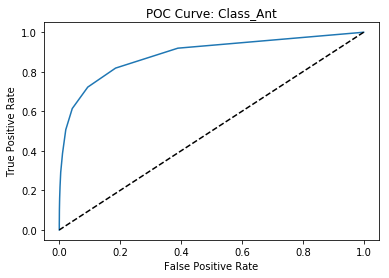

In [228]:
# ROC plot
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test_C0 , y_scores )
plot_ROC_Curve(fpr,tpr, 'Class_Ant')

# AUC of ROC
roc_auc_score_C0 = roc_auc_score(y_test_C0, y_scores)
print(roc_auc_score_C0)
print(metrics.auc(fpr, tpr))
# Both ways will work to compute area under the curve

# For label 1, Class 1, Bear

In [166]:
y_train_C1 = y_train_dummy.iloc[:,1]
y_test_C1 = y_test_dummy.iloc[:,1]

In [167]:
# Model Construction and fitting
KNN_13_C1_clf = KNeighborsClassifier(n_neighbors=13)
KNN_13_C1_clf.fit(X_train, y_train_C1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

In [168]:
# Predicted prob on testing set
pred_prob_C1 = KNN_13_C1_clf.predict_proba(X_test)

In [229]:
# The predicted prob, y_scores
y_scores=pred_prob_C1[:,1]

In [230]:
precision, recall, threshold = precision_recall_curve(y_test_C1, y_scores  )

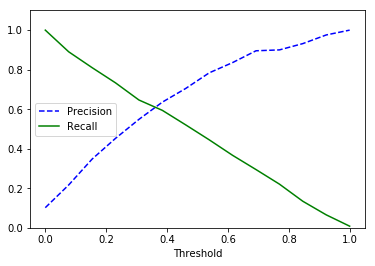

In [231]:
plot_PR_Curve_vs_threshold(precision, recall, threshold)

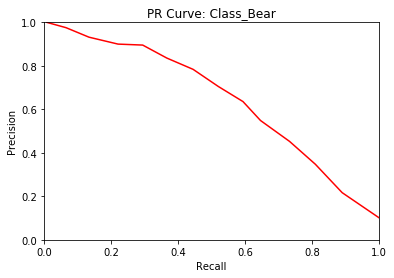

In [232]:
plot_PR_Curve(precision, recall, 'Class_Bear')

In [234]:
pr_auc_score_C1 = metrics.auc(recall, precision)
pr_auc_score_C1

0.6525931909375178

0.8780301693544983
0.8780301693544983


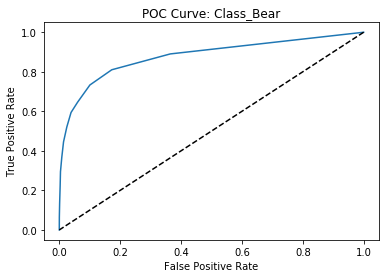

In [237]:
# ROC plot
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test_C1 , y_scores )
plot_ROC_Curve(fpr,tpr, 'Class_Bear')

# AUC of ROC
roc_auc_score_C1 = roc_auc_score(y_test_C1, y_scores)
print(roc_auc_score_C1)
print(metrics.auc(fpr, tpr))
# Both ways will work to compute area under the curve

## PR Curve In multi-label settings

In [254]:
with open('xtrain_doodle.pickle', 'rb') as f:
    X_train = pickle.load(f)

with open('xtest_doodle.pickle', 'rb') as f:
    X_test = pickle.load(f)

with open('ytrain_doodle.pickle', 'rb') as f:
    y_train = pickle.load(f)

with open('ytest_doodle.pickle', 'rb') as f:
    y_test = pickle.load(f)

In [5]:
random_state = np.random.RandomState(0)

In [9]:
# label_binarize
from sklearn.preprocessing import label_binarize

# Use label_binarize to be multi-label like settings
y_train_binarize = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y_test_binarize = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = 10

In [10]:
# We use OneVsRestClassifier for multi-label prediction
from sklearn.multiclass import OneVsRestClassifier

# Run classifier
classifier = OneVsRestClassifier( KNeighborsClassifier(n_neighbors=13))
classifier.fit(X_train, y_train_binarize )
y_score = classifier.predict_proba(X_test)

In [11]:
y_score.shape

(6000, 10)

In [12]:
y_score[0]

array([0.        , 0.        , 0.        , 0.92307692, 0.        ,
       0.        , 0.        , 0.07692308, 0.        , 0.        ])

# The average precision score in multi-label settings

In [13]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve (y_test_binarize[:, i], y_score[:, i])
    average_precision[i]       = average_precision_score(y_test_binarize[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve (y_test_binarize.ravel(),y_score.ravel())
average_precision["micro"]             = average_precision_score(y_test_binarize, y_score, average="micro")


print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.63


In [14]:
average_precision

{0: 0.6240711380657332,
 1: 0.6171017168517228,
 2: 0.7104007136629686,
 3: 0.6394545244395505,
 4: 0.7159147383422624,
 5: 0.42748517252639817,
 6: 0.6142674288005944,
 7: 0.6299733774412575,
 8: 0.6277757731951032,
 9: 0.8653721841656927,
 'micro': 0.6254079638410011}

In [15]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test_binarize, y_score , average = 'micro')

0.6254079638410011

In [16]:
# Precision for
from sklearn import metrics
metrics.precision_score(y_test, prediction13 , average='micro')  

NameError: name 'prediction13' is not defined

In [331]:
# Recall
metrics.recall_score(y_test, prediction13, average='micro')  

0.6055

In [329]:
#f1 score
metrics.f1_score(y_test, prediction13, average='micro') 

0.6055

# Plot the micro-averaged Precision-Recall curve

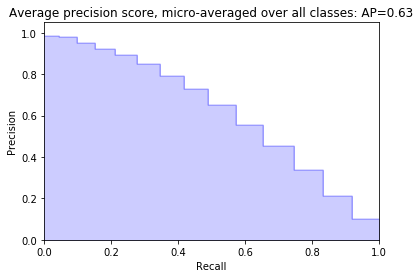

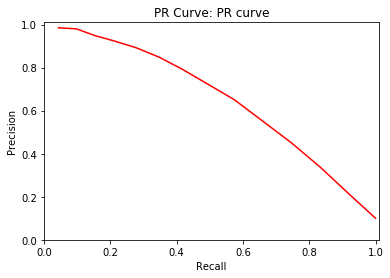

area under the curve:  0.6610758220219836


In [17]:
from sklearn.utils.fixes import signature
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})


plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b',**step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))
plt.show()

###############################################################
def plot_PR_Curve(precision, recall, title):
    plt.plot( recall[:-1], precision[:-1], 'red')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.axis([0,1.01,0,1.01])
    plt.title( 'PR Curve: '+title)
    plt.show()

plot_PR_Curve(precision["micro"], recall["micro"], "PR curve")

################################################################
pr_auc_score_MICRO = metrics.auc(recall["micro"], precision["micro"])
print( 'area under the curve: ', pr_auc_score_MICRO )

# Plot Precision-Recall curve for each class and iso-f1 curves

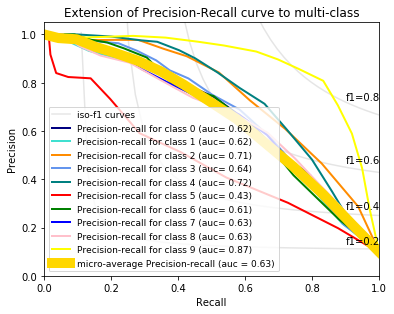

In [54]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red',
                'green', 'blue' ,'pink', 'yellow', 'brwon', 'purple'])

plt.figure(figsize=(6, 4))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []

# F1 scores
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')


#PR curve for each class
for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (auc= {1:0.2f})'
                  ''.format(i, average_precision[i]))

# Average PR curve
l, = plt.plot(recall["micro"], precision["micro"], color='gold', linewidth=10)
lines.append(l)
labels.append('micro-average Precision-recall (auc = {0:0.2f})'.format(average_precision["micro"]))

    
fig = plt.gcf()
fig.subplots_adjust(bottom=0)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
#plt.legend(lines, labels, loc=(0, -.58), prop=dict(size=14))
plt.legend(lines, labels, loc='lower left', prop=dict(size=9))

plt.show()

# Plot for micro-averaged ROC curve

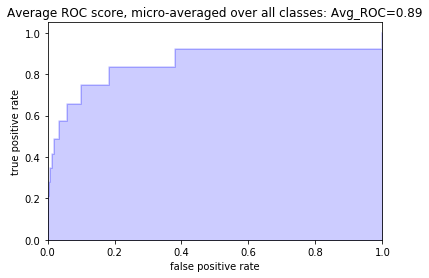

In [34]:
# ROC plot
from sklearn import metrics

# For each class
fpr = dict()
tpr = dict()
average_ROC = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ =       metrics.roc_curve(y_test_binarize[:, i], y_score[:, i])
    average_ROC [i]   = average_precision_score(y_test_binarize[:, i], y_score[:, i], average= 'micro')

# A "micro-average": quantifying score on all classes jointly
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test_binarize.ravel(),y_score.ravel())
average_ROC["micro"]          = metrics.roc_auc_score(y_test_binarize.ravel(),y_score.ravel())


# Plot
plt.figure()
plt.step(fpr['micro'], tpr['micro'], color='b', alpha=0.2,where='post')
plt.fill_between(fpr["micro"], tpr["micro"], alpha=0.2, color='b',**step_kwargs)

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average ROC score, micro-averaged over all classes: Avg_ROC={0:0.2f}'
    .format(average_ROC["micro"]))
plt.show()

In [38]:
print('Average ROC score, micro-averaged over all classes: {0:0.2f}'.format(average_ROC["micro"]))

Average ROC score, micro-averaged over all classes: 0.89


# Plot ROC curve for each class 

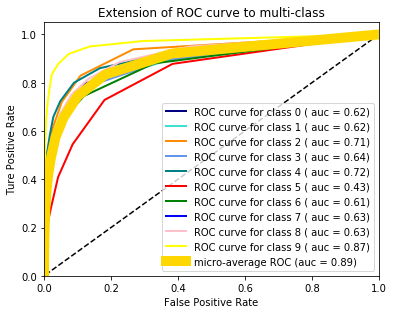

In [55]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red',
                'green', 'blue' ,'pink', 'yellow', 'brwon'])

plt.figure(figsize=(6, 4))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []

# Diagnal line
plt.plot([1,0],[1,0], 'k--')



#ROC curve for each class
for i, color in zip(range(n_classes), colors):
    l, = plt.plot(fpr[i], tpr[i], color=color, lw=2)
    lines.append(l)
    labels.append('ROC curve for class {0} ( auc = {1:0.2f})' .format(i, average_ROC[i]))


    
# Average ROC curve
l, = plt.plot(fpr["micro"], tpr["micro"], color='gold', lw=10)
lines.append(l)
labels.append('micro-average ROC (auc = {0:0.2f})'.format(average_ROC["micro"]))
    
    
fig = plt.gcf()
fig.subplots_adjust(bottom=0)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Ture Positive Rate')
plt.title('Extension of ROC curve to multi-class')
#plt.legend(lines, labels, loc=(0, -.58), prop=dict(size=14))
plt.legend(lines, labels, loc='lower right', prop=dict(size=10))

plt.show()